In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")

df_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  24 non-null     float64
 1   Salary           24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


In [4]:
df_train.sample(10)

,YearsExperience,Salary
10,4.0,56957.0
22,9.6,112635.0
9,4.0,55794.0
17,7.1,98273.0
13,5.1,66029.0
19,8.7,109431.0
0,1.1,39343.0
6,3.2,64445.0
5,3.2,54445.0
8,3.9,63218.0


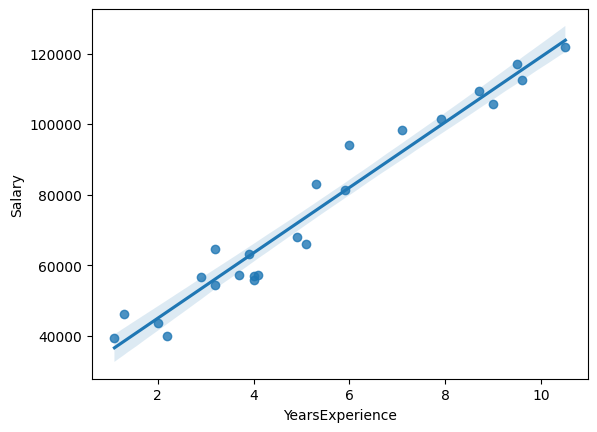

In [9]:
# fig,axis = plt.subplots(1, 1)
sns.regplot(data=df_train, x="YearsExperience", y="Salary")
plt.show()

In [10]:
df_train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.977132
Salary,0.977132,1.000000


In [15]:
X_train = df_train[["YearsExperience"]]

y_train = df_train["Salary"]

X_test = df_test[["YearsExperience"]]

y_test = df_test["Salary"]

In [16]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [17]:
print(f"Bo: {model.intercept_}")
print(f"B1: {model.coef_}")

Bo: 26354.43069701219
B1: [9277.78307971]


In [18]:
y_hat = model.predict(X_test)
y_hat

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

In [20]:
print(f"mean squared error (MSE): {mean_squared_error(y_test, y_hat)}")

mean squared error (MSE): 37649779.451336615


In [22]:
print(f"r squared (r2): {r2_score(y_test, y_hat)}")

r squared (r2): 0.959714925174946


In [23]:
def equation(x):
    return 26354.43 + (9277.78 * x)


[]

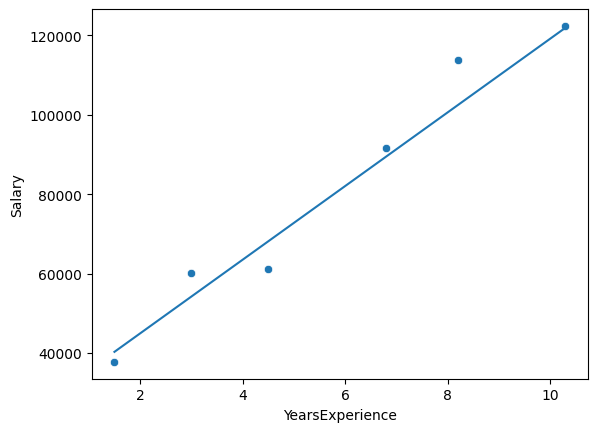

In [25]:
sns.scatterplot(data=df_test, x="YearsExperience", y="Salary")
sns.lineplot(x=df_test.YearsExperience, y=equation(df_test.YearsExperience))
plt.plot()

In [26]:
df_multi_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")

df_multi_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")



In [27]:
df_multi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8000 non-null   float64
 1   Height  8000 non-null   float64
 2   Weight  8000 non-null   float64
dtypes: float64(3)
memory usage: 187.6 KB


In [28]:
df_multi_train.sample(10)

,Gender,Height,Weight
6376,-1.0,-0.275593,158.410823
1998,1.0,0.747811,179.366457
5688,1.0,-0.139293,165.592195
7069,1.0,0.394993,183.343327
5459,-1.0,-0.121531,159.849823
5432,-1.0,0.079651,162.311506
6144,-1.0,-0.254948,154.239363
1636,1.0,-0.294609,167.372980
2017,1.0,1.246797,199.042920
1412,1.0,0.578165,196.184005


In [30]:
df_multi_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8000.0,0.001750,1.000061,-1.000000,-1.000000,1.000000,1.000000,1.000000
Height,8000.0,0.006488,0.999803,-3.146184,-0.736128,-0.006571,0.735436,3.283099
Weight,8000.0,161.651425,31.980908,64.700127,136.223075,161.549008,187.229144,269.989699


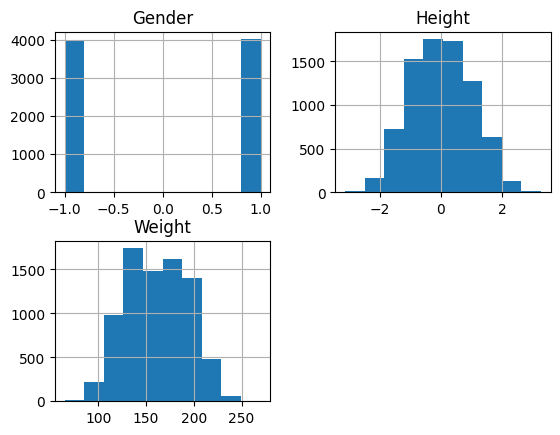

In [32]:
df_multi_train.hist()
plt.show()

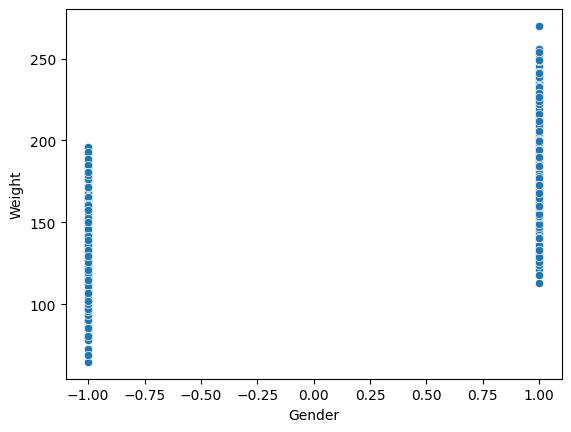

In [33]:
sns.scatterplot(data=df_multi_train, x="Gender", y="Weight")
plt.show()

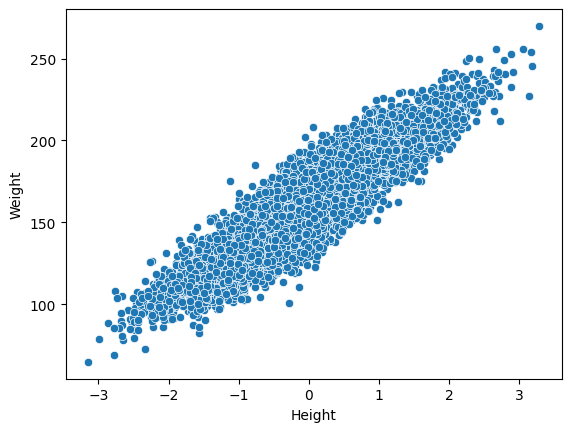

In [34]:
sns.scatterplot(data=df_multi_train, x="Height", y="Weight")
plt.show()

In [35]:
df_multi_train.corr()

,Gender,Height,Weight
Gender,1.000000,0.691515,0.796480
Height,0.691515,1.000000,0.924081
Weight,0.796480,0.924081,1.000000


In [36]:
X_multi_train = df_multi_train[["Gender", "Height"]]

y_multi_train = df_multi_train["Weight"]

X_multi_test = df_multi_test[["Gender", "Height"]]

y_multi_test = df_multi_test["Weight"]

In [37]:
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_multi_train)

LinearRegression()

In [38]:
print(f"Bo: {multi_model.intercept_}")
print(f"B1 and B2: {multi_model.coef_}")

Bo: 161.48606316160345
B1 and B2: [ 9.65020608 22.88377295]


In [39]:
y_multi_hat = multi_model.predict(X_multi_test)

In [40]:
print(f"mean squared error (MSE): {mean_squared_error(y_multi_hat, y_multi_test)}")
print(f"coefficient of determination (r2): {r2_score(y_multi_hat, y_multi_test)}")

mean squared error (MSE): 98.21235363443171
coefficient of determination (r2): 0.8934895708789713


In [44]:
X_uni_train = df_multi_train[["Gender"]]

y_uni_train = df_multi_train["Weight"]

X_uni_test = df_multi_test[["Gender"]]

y_uni_test = df_multi_test["Weight"]

In [45]:
uni_model = LinearRegression()
uni_model.fit(X_uni_train, y_uni_train)

LinearRegression()

In [46]:
print(f"Bo: {uni_model.intercept_}")
print(f"B1 and B2: {uni_model.coef_}")

Bo: 161.60685108627294
B1 and B2: [25.47061025]


In [47]:
y_uni_hat = uni_model.predict(X_uni_test)

In [48]:
print(f"mean squared error (MSE): {mean_squared_error(y_uni_hat, y_uni_test)}")
print(f"coefficient of determination (r2): {r2_score(y_uni_hat, y_uni_test)}")

mean squared error (MSE): 387.09049605093895
coefficient of determination (r2): 0.40330130384903595


In [ ]:
# 98.2 vs 387.09 | Smaller MSE = better model
# 0.89 vs 0.40 | Greater r2 = better model
# The more variables available in the model yield a better r2, even when the variables are not relevant to the model.